# Total Individual Have Been Vaccinated on India

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Data Extraction 

In [2]:
vaccine = pd.read_csv('covid_vaccine_statewise.csv')

In [3]:
vaccine.shape

(6699, 18)

In [4]:
vaccine.head()

Updated_On  State  Total_Doses_Administered  Total_Sessions_Conducted  \
0  16/01/2021  India                   48276.0                    3455.0   
1  17/01/2021  India                   58604.0                    8532.0   
2  18/01/2021  India                   99449.0                   13611.0   
3  19/01/2021  India                  195525.0                   17855.0   
4  20/01/2021  India                  251280.0                   25472.0   

   Total_Sites   First_Dose_Administered  Second_Dose_Administered  \
0        2957.0                  48276.0                       0.0   
1        4954.0                  58604.0                       0.0   
2        6583.0                  99449.0                       0.0   
3        7951.0                 195525.0                       0.0   
4       10504.0                 251280.0                       0.0   

   Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
0                      23757.0                        24517.0   
1                      27348.0                        31252.0   
2                      41361.0                        58083.0   
3                      81901.0                       113613.0   
4                      98111.0                       153145.0   

   Transgender_Individuals_Vaccinated  Total_Covaxin_Administered  \
0                                 2.0                       579.0   
1                                 4.0                       635.0   
2                                 5.0                      1299.0   
3                                11.0                      3017.0   
4                                24.0                      3946.0   

   Total_CoviShield_Administered  Total_Sputnik_V_Administered  AEFI  \
0                        47697.0                           NaN   NaN   
1                        57969.0                           NaN   NaN   
2                        98150.0                           NaN   NaN   
3                       192508.0                           NaN   NaN   
4                       247334.0                           NaN   NaN   

   18-45 years (Age)  45-60 years (Age)  60+ years (Age)  \
0                NaN                NaN              NaN   
1                NaN                NaN              NaN   
2                NaN                NaN              NaN   
3                NaN                NaN              NaN   
4                NaN                NaN              NaN   

   Total_Individuals_Vaccinated  
0                       48276.0  
1                       58604.0  
2                       99449.0  
3                      195525.0  
4                      251280.0

In [5]:
vaccine.describe()

Total_Doses_Administered  Total_Sessions_Conducted  Total_Sites   \
count              6.364000e+03              6.363000e+03   6363.000000   
mean               6.413310e+06              3.957716e+05   2360.343549   
std                2.615880e+07              1.656387e+06   7508.979436   
min                0.000000e+00              0.000000e+00      0.000000   
25%                9.749425e+04              4.498000e+03     70.500000   
50%                5.369145e+05              2.588400e+04    616.000000   
75%                4.872305e+06              2.613895e+05   1790.000000   
max                3.561929e+08              3.501031e+07  73933.000000   

       First_Dose_Administered  Second_Dose_Administered  \
count             6.363000e+03              6.363000e+03   
mean              5.254151e+06              1.160167e+06   
std               2.132565e+07              4.882363e+06   
min               7.000000e+00              0.000000e+00   
25%               8.277550e+04              6.405500e+03   
50%               4.589680e+05              7.715800e+04   
75%               4.119336e+06              7.264175e+05   
max               2.901329e+08              6.606008e+07   

       Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
count                 6.363000e+03                   6.363000e+03   
mean                  2.919990e+06                   2.568098e+06   
std                   1.225694e+07                   1.064744e+07   
min                   0.000000e+00                   2.000000e+00   
25%                   4.299600e+04                   3.760850e+04   
50%                   2.581390e+05                   2.392390e+05   
75%                   2.203892e+06                   1.961909e+06   
max                   1.911604e+08                   1.649711e+08   

       Transgender_Individuals_Vaccinated  Total_Covaxin_Administered  \
count                         6363.000000                6.363000e+03   
mean                           835.393368                6.928136e+05   
std                           3737.993697                2.991176e+06   
min                              0.000000                0.000000e+00   
25%                              4.000000                0.000000e+00   
50%                             69.000000                4.760000e+03   
75%                            562.000000                4.669140e+05   
max                          61451.000000                4.401880e+07   

       Total_CoviShield_Administered  Total_Sputnik_V_Administered  \
count                   6.363000e+03                   1737.000000   
mean                    5.707424e+06                   2066.254462   
std                     2.319046e+07                   9614.132634   
min                     7.000000e+00                      0.000000   
25%                     9.561450e+04                      0.000000   
50%                     4.989140e+05                      0.000000   
75%                     4.258910e+06                     79.000000   
max                     3.120454e+08                 128733.000000   

               AEFI  18-45 years (Age)  45-60 years (Age)  60+ years (Age)  \
count   4180.000000       4.177000e+03       4.178000e+03     4.178000e+03   
mean    1073.564833       1.955834e+06       3.275439e+06     2.887759e+06   
std     3246.612821       8.448696e+06       1.095290e+07     9.204842e+06   
min        0.000000       1.059000e+03       1.136000e+03     5.580000e+02   
25%       94.000000       6.454900e+04       1.017950e+05     6.404975e+04   
50%      283.000000       3.382580e+05       9.198940e+05     8.211470e+05   
75%      716.000000       1.068349e+06       2.727498e+06     2.533357e+06   
max    23960.000000       1.361586e+08       1.229163e+08     9.711800e+07   

       Total_Individuals_Vaccinated  
count                  6.363000e+03  
mean                   5.265380e+06  
std                    2.132828e+07  
min                    7

In [6]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Updated_On                          6699 non-null   object 
 1   State                               6699 non-null   object 
 2   Total_Doses_Administered            6364 non-null   float64
 3   Total_Sessions_Conducted            6363 non-null   float64
 4   Total_Sites                         6363 non-null   float64
 5   First_Dose_Administered             6363 non-null   float64
 6   Second_Dose_Administered            6363 non-null   float64
 7   Male_Individuals_Vaccinated         6363 non-null   float64
 8   Female_Individuals_Vaccinated       6363 non-null   float64
 9   Transgender_Individuals_Vaccinated  6363 non-null   float64
 10  Total_Covaxin_Administered          6363 non-null   float64
 11  Total_CoviShield_Administered       6363 no

## Selection Data 

In [8]:
df = vaccine[['Male_Individuals_Vaccinated', 'Female_Individuals_Vaccinated', 'Transgender_Individuals_Vaccinated', 
              'Total_Individuals_Vaccinated']]
df.head()

Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
0                      23757.0                        24517.0   
1                      27348.0                        31252.0   
2                      41361.0                        58083.0   
3                      81901.0                       113613.0   
4                      98111.0                       153145.0   

   Transgender_Individuals_Vaccinated  Total_Individuals_Vaccinated  
0                                 2.0                       48276.0  
1                                 4.0                       58604.0  
2                                 5.0                       99449.0  
3                                11.0                      195525.0  
4                                24.0                      251280.0

## Cleaning Data 

In [11]:
df.isnull().sum()

Male_Individuals_Vaccinated           336
Female_Individuals_Vaccinated         336
Transgender_Individuals_Vaccinated    336
Total_Individuals_Vaccinated          336
dtype: int64

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
0                      23757.0                        24517.0   
1                      27348.0                        31252.0   
2                      41361.0                        58083.0   
3                      81901.0                       113613.0   
4                      98111.0                       153145.0   

   Transgender_Individuals_Vaccinated  Total_Individuals_Vaccinated  
0                                 2.0                       48276.0  
1                                 4.0                       58604.0  
2                                 5.0                       99449.0  
3                                11.0                      195525.0  
4                                24.0                      251280.0

## Transform Data

In [20]:
#male vaccine
df['Male_Individuals_Vaccinated'] = df['Male_Individuals_Vaccinated'].astype(int)

#female vaccine
df['Female_Individuals_Vaccinated'] = df['Female_Individuals_Vaccinated'].astype(int)

#transgender vaccine
df['Transgender_Individuals_Vaccinated'] = df['Transgender_Individuals_Vaccinated'].astype(int)

#total vaccine
df['Total_Individuals_Vaccinated'] = df['Total_Individuals_Vaccinated'].astype(int)
df.head()

Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
0                        23757                          24517   
1                        27348                          31252   
2                        41361                          58083   
3                        81901                         113613   
4                        98111                         153145   

   Transgender_Individuals_Vaccinated  Total_Individuals_Vaccinated  
0                                   2                         48276  
1                                   4                         58604  
2                                   5                         99449  
3                                  11                        195525  
4                                  24                        251280

## K-Nearest Neighbours Model

In [21]:
#scale data target
scaler = StandardScaler()
scaler.fit(df.drop('Total_Individuals_Vaccinated', axis = 1))
scaled_feature = scaler.transform(df.drop('Total_Individuals_Vaccinated', axis = 1))
feature = pd.DataFrame(scaled_feature, columns = df.columns[:-1])
feature.head()

Male_Individuals_Vaccinated  Female_Individuals_Vaccinated  \
0                    -0.236312                      -0.238910   
1                    -0.236019                      -0.238277   
2                    -0.234876                      -0.235757   
3                    -0.231568                      -0.230542   
4                    -0.230245                      -0.226828   

   Transgender_Individuals_Vaccinated  
0                           -0.222970  
1                           -0.222434  
2                           -0.222167  
3                           -0.220562  
4                           -0.217084

In [55]:
X_train, X_test, y_train, y_test = train_test_split( scaled_feature, df['Total_Individuals_Vaccinated'], test_size = 0.4, 
                                                    random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3817, 3)
(3817,)
(2546, 3)
(2546,)


In [56]:
#generate model
knc = KNeighborsClassifier(n_neighbors = 2)
knc.fit(X_train, y_train)
pred_knc = knc.predict(X_test)

print(X_test)
print(pred_knc)

[[ 0.45032142  0.42385498  0.39291721]
 [-0.22699333 -0.23062998 -0.22029413]
 [-0.13729186 -0.13004741 -0.14163613]
 ...
 [-0.07366992 -0.05922708 -0.0161579 ]
 [-0.23473584 -0.23846187 -0.22270203]
 [ 0.33670133  0.33014643  0.24202227]]
[13260693   246598  2307539 ...  3362065    71964 13283712]


In [57]:
#prediction & accuracy score
prediction = knc.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(prediction)
print(accuracy)

[13260693   246598  2307539 ...  3362065    71964 13283712]
0.023173605655930872


In [58]:
#confusion matrix
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

           7       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       2.0
          38       0.00      0.00      0.00       0.0
          50       0.00      0.00      0.00       1.0
          62       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       2.0
          66       0.00      0.00      0.00       1.0
          72       0.00      0.00      0.00       2.0
          78       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       2.0
          94       0.00      0.00      0.00       1.0
          98 

c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1

Text(0, 0.5, 'Error Rate')

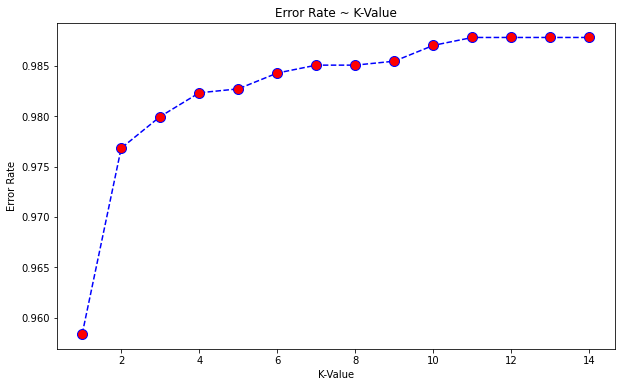

In [61]:
#k-value
error_rate = []

for i in range(1, 15):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize =(10, 6))
plt.plot(range(1, 15), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate ~ K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [62]:
#training & testing data accuracy
k_nearest = np.arange(1, 15)
train_accuracy = np.empty(len(k_nearest))
test_accuracy = np.empty(len(k_nearest))
print(train_accuracy)
print(test_accuracy)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[9.61264094e-312 3.98935209e-312 3.98935209e-312 1.08646185e-311
 1.08646185e-311 3.98935209e-312 3.98935209e-312 2.80103445e-312
 2.80103445e-312 3.50292543e-321 3.20154539e-321 2.80103445e-312
 2.80103445e-312 4.18033171e-312]


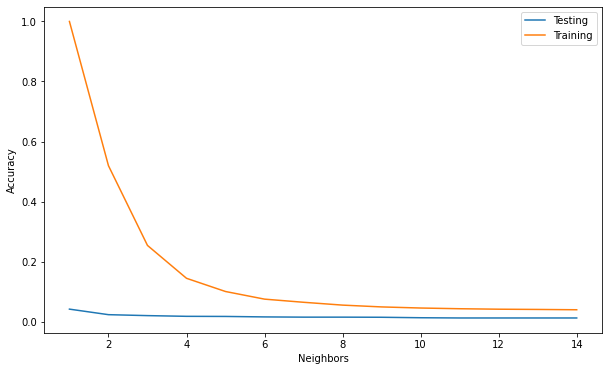

In [63]:
#plotting
for i, k in enumerate(k_nearest):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    train_accuracy[i] = knc.score(X_train, y_train)
    test_accuracy[i] = knc.score(X_test, y_test)
    
plt.figure(figsize=(10,6))
plt.plot(k_nearest, test_accuracy, label = 'Testing')
plt.plot(k_nearest, train_accuracy, label = 'Training')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [64]:
#compare K-value
knc = KNeighborsClassifier(n_neighbors = 10)
  
knc.fit(X_train, y_train)
knc_predict = knc.predict(X_test)
  
print('K = 10')
print('\n')
print(confusion_matrix(y_test, knc_predict))
print('\n')
print(classification_report(y_test, knc_predict))

knc = KNeighborsClassifier(n_neighbors = 20)
  
knc.fit(X_train, y_train)
knc_predict = knc.predict(X_test)
  
print('K = 20')
print('\n')
print(confusion_matrix(y_test, knc_predict))
print('\n')
print(classification_report(y_test, knc_predict))

K = 10


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          23       0.12      1.00      0.22         1
          31       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         2
          66       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         2
          94       0.00      0.00      0.00         1
    

c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          23       0.05      1.00      0.10         1
          31       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         2
          66       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         2
          94       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         102 

c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1

<AxesSubplot:>

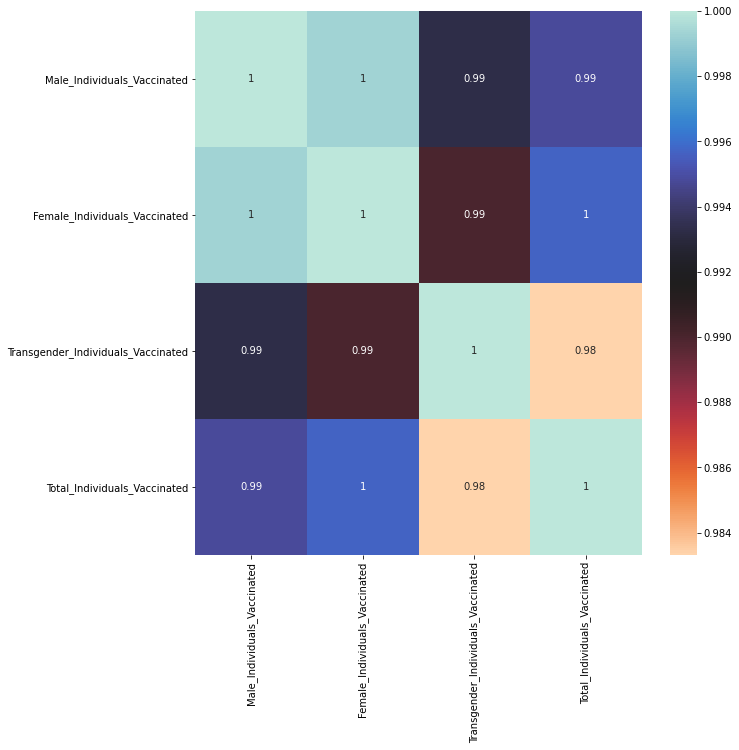

In [82]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire_r')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


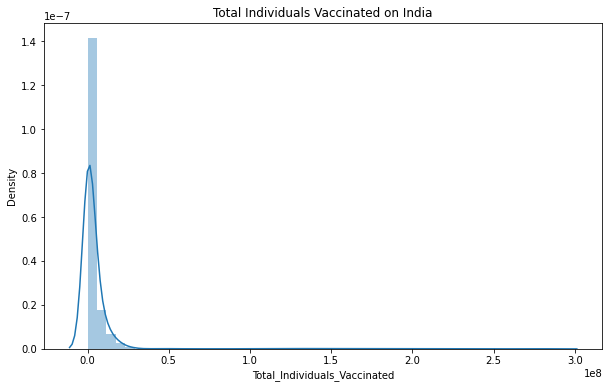

In [83]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Total_Individuals_Vaccinated)
plt.title("Total Individuals Vaccinated on India")
plt.show()